# xlm-Roberta fine-tuned English data

Accuracy: 0.8133
F1 Score (Micro): 0.8133
F1 Score (Macro): 0.8179
Confusion Matrix:
[[ 5  0  1]
 [ 1 25  7]
 [ 0  5 31]]


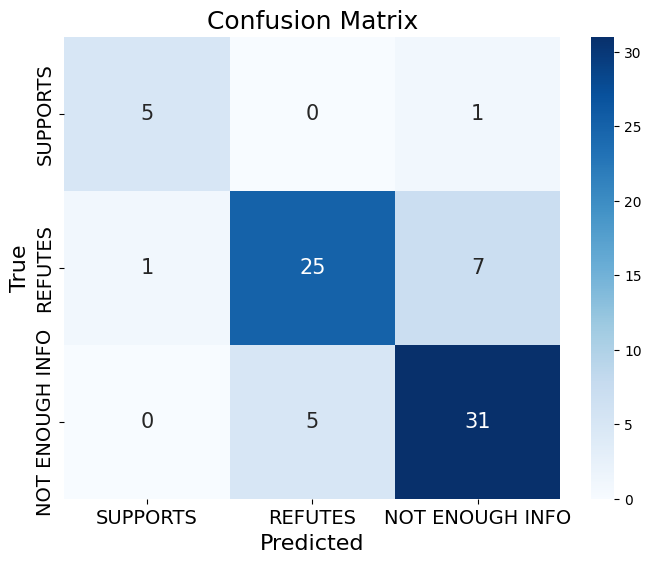

In [5]:
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
from preparing.data_loading import DataLoader
from preparing.data_cleaning import DataCleaner
from utils.preprocessing import preprocess_data
from utils.data_preparation import create_rumor_evidence_label_pairs, prepare_dataset_for_classification_llm_roberta
from evaluation.verification_evaluation import evaluate_llm_model
from utils.data_split import load_and_combine_datasets, stratified_split
from preparing.preprocessor import Preprocessor



train_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/English_train.json'
dev_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/English_dev.json'
fine_tuned_model_path = '/Users/alaaeddinalia/Desktop/submission/Rumor-Verification/src/traind_models/fine-tuned-xlm-roberta_EA'


# Combine datasets
data = load_and_combine_datasets(train_file, dev_file)


#Cleandata
cleaner = DataCleaner()
clean_data = cleaner.remove_invalid_tweets(data)

#Preprocess dataset
preprocessor = Preprocessor()
preprocessed_data = preprocess_data(clean_data,preprocessor)

#data split
train_data, test_data = stratified_split(preprocessed_data, label_key='label')

# Create rumor-evidence-label pairs
rumor_evidence_label_test = create_rumor_evidence_label_pairs(test_data)

# Prepare data for classification (rumor + evidence)
test_texts, test_labels = prepare_dataset_for_classification_llm_roberta(rumor_evidence_label_test)


label_mapping_reverse = {"SUPPORTS": 0, "REFUTES": 1, "NOT ENOUGH INFO": 2}
test_labels_mapped = [label_mapping_reverse[label] for label in test_labels]

# Load tokenizer and model
tokenizer = XLMRobertaTokenizer.from_pretrained(fine_tuned_model_path)
model = XLMRobertaForSequenceClassification.from_pretrained(fine_tuned_model_path,num_labels=3)



# Tokenize texts (rumor + evidence) 
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='pt', max_length=256)


test_labels_tensor = torch.tensor(test_labels_mapped)

model.eval()
with torch.no_grad():
    outputs = model(**test_encodings)
    predictions = torch.argmax(outputs.logits, dim=-1)


#Evaluate the model
evaluate_llm_model(test_labels_tensor,predictions)

#  xlm-Roberta fine-tuned Arabic data

Accuracy: 0.7647
F1 Score (Micro): 0.7647
F1 Score (Macro): 0.6480
Confusion Matrix:
[[ 5  0  1]
 [ 5  7  6]
 [ 3  1 40]]


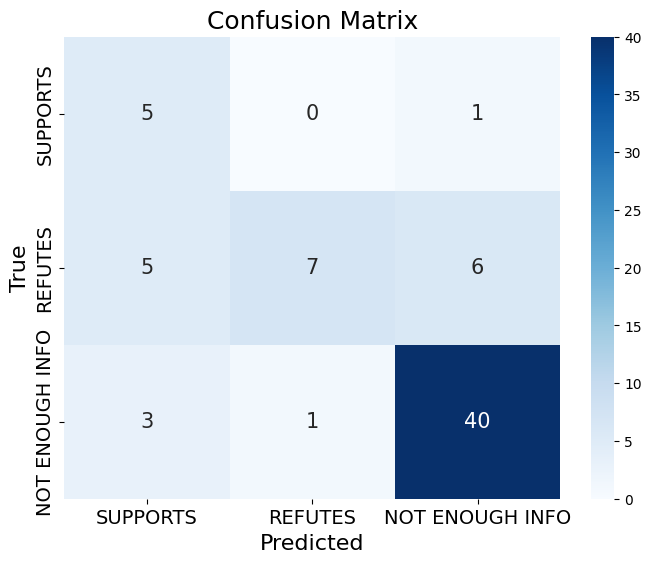

In [2]:
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
from preparing.data_loading import DataLoader
from preparing.data_cleaning import DataCleaner
from utils.preprocessing import preprocess_data
from utils.data_preparation import create_rumor_evidence_label_pairs, prepare_dataset_for_classification_llm_roberta
from evaluation.verification_evaluation import evaluate_llm_model
from utils.data_split import load_and_combine_datasets, stratified_split
from preparing.preprocessor import Preprocessor



train_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/Arabic_train.json'
dev_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/Arabic_dev.json'
fine_tuned_model_path = '/Users/alaaeddinalia/Desktop/submission/Rumor-Verification/src/traind_models/fine-tuned-xlm-roberta_EA'


# Combine datasets
data = load_and_combine_datasets(train_file, dev_file)


#Cleandata
cleaner = DataCleaner()
clean_data = cleaner.remove_invalid_tweets(data)

#Preprocess dataset
preprocessor = Preprocessor()
preprocessed_data = preprocess_data(clean_data,preprocessor)

#data split
train_data, test_data = stratified_split(preprocessed_data, label_key='label')

# Create rumor-evidence-label pairs
rumor_evidence_label_test = create_rumor_evidence_label_pairs(test_data)

# Prepare data for classification (rumor + evidence)
test_texts, test_labels = prepare_dataset_for_classification_llm_roberta(rumor_evidence_label_test)


label_mapping_reverse = {"SUPPORTS": 0, "REFUTES": 1, "NOT ENOUGH INFO": 2}
test_labels_mapped = [label_mapping_reverse[label] for label in test_labels]

# Load tokenizer and model
tokenizer = XLMRobertaTokenizer.from_pretrained(fine_tuned_model_path)
model = XLMRobertaForSequenceClassification.from_pretrained(fine_tuned_model_path)



# Tokenize texts (rumor + evidence) 
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='pt', max_length=256)


test_labels_tensor = torch.tensor(test_labels_mapped)

model.eval()
with torch.no_grad():
    outputs = model(**test_encodings)
    predictions = torch.argmax(outputs.logits, dim=-1)


#Evaluate the model
evaluate_llm_model(test_labels_tensor,predictions)

# xlm-roberta base English data

In [ ]:
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
from preparing.data_loading import DataLoader
from preparing.data_cleaning import DataCleaner
from utils.preprocessing import preprocess_data
from utils.data_preparation import create_rumor_evidence_label_pairs, prepare_dataset_for_classification
from evaluation.verification_evaluation import evaluate_llm_model
from utils.data_split import load_and_combine_datasets, stratified_split
from preparing.preprocessor import Preprocessor



train_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/English_train.json'
dev_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/English_dev.json'


# Combine datasets
data = load_and_combine_datasets(train_file, dev_file)


#Cleandata
cleaner = DataCleaner()
clean_data = cleaner.remove_invalid_tweets(data)

#Preprocess dataset
preprocessor = Preprocessor()
preprocessed_data = preprocess_data(clean_data,preprocessor)

#data split
train_data, test_data = stratified_split(preprocessed_data, label_key='label')

# Create rumor-evidence-label pairs
rumor_evidence_label_test = create_rumor_evidence_label_pairs(test_data)

# Prepare data for classification (rumor + evidence)
test_texts, test_labels = prepare_dataset_for_classification(rumor_evidence_label_test)


label_mapping_reverse = {"SUPPORTS": 0, "REFUTES": 1, "NOT ENOUGH INFO": 2}
test_labels_mapped = [label_mapping_reverse[label] for label in test_labels]

# Load tokenizer and model xlm-roberta zero-shot
tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')
model = XLMRobertaForSequenceClassification.from_pretrained('xlm-roberta-base',num_labels=3)



# Tokenize texts (rumor + evidence) 
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='pt', max_length=256)


test_labels_tensor = torch.tensor(test_labels_mapped)

model.eval()
with torch.no_grad():
    outputs = model(**test_encodings)
    predictions = torch.argmax(outputs.logits, dim=-1)


#Evaluate the model
evaluate_llm_model(test_labels_tensor,predictions)

# xlm-roberta base Arabic data

In [ ]:
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
from preparing.data_loading import DataLoader
from preparing.data_cleaning import DataCleaner
from utils.preprocessing import preprocess_data
from utils.data_preparation import create_rumor_evidence_label_pairs, prepare_dataset_for_classification
from evaluation.verification_evaluation import evaluate_llm_model
from utils.data_split import load_and_combine_datasets, stratified_split
from preparing.preprocessor import Preprocessor



train_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/Arabic_train.json'
dev_file = '/Users/alaaeddinalia/Desktop/thesis_submission /Rumor_verification/data/raw/Arabic_dev.json'


# Combine datasets
data = load_and_combine_datasets(train_file, dev_file)


#Cleandata
cleaner = DataCleaner()
clean_data = cleaner.remove_invalid_tweets(data)

#Preprocess dataset
preprocessor = Preprocessor()
preprocessed_data = preprocess_data(clean_data,preprocessor)

#data split
train_data, test_data = stratified_split(preprocessed_data, label_key='label')

# Create rumor-evidence-label pairs
rumor_evidence_label_test = create_rumor_evidence_label_pairs(test_data)

# Prepare data for classification (rumor + evidence)
test_texts, test_labels = prepare_dataset_for_classification(rumor_evidence_label_test)


label_mapping_reverse = {"SUPPORTS": 0, "REFUTES": 1, "NOT ENOUGH INFO": 2}
test_labels_mapped = [label_mapping_reverse[label] for label in test_labels]

# Load tokenizer and model zero-shot
tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')
model = XLMRobertaForSequenceClassification.from_pretrained('xlm-roberta-base',num_labels=3)



# Tokenize texts (rumor + evidence) 
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='pt', max_length=256)


test_labels_tensor = torch.tensor(test_labels_mapped)

model.eval()
with torch.no_grad():
    outputs = model(**test_encodings)
    predictions = torch.argmax(outputs.logits, dim=-1)


#Evaluate the model
evaluate_llm_model(test_labels_tensor,predictions)